In [1]:
conda install geopandas

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point, Polygon
import descartes
import numpy as np

In [5]:
block = geopandas.read_file ("data/Shapefile/tl_2010_37081_tabblock10.shp")

In [6]:
type(block)

geopandas.geodataframe.GeoDataFrame

In [7]:
block.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,37,081,016900,1001,370810169001001,Block 1001,G5040,R,None,None,S,114746,0,+35.9720551,-079.7229040,"POLYGON ((-79.72861 35.97573, -79.72858 35.975..."
1,37,081,016900,1040,370810169001040,Block 1040,G5040,R,None,None,S,165859,0,+35.9508420,-079.7272013,"POLYGON ((-79.72310 35.94995, -79.72497 35.949..."
2,37,081,016900,2030,370810169002030,Block 2030,G5040,R,None,None,S,196716,0,+35.9235044,-079.7827246,"POLYGON ((-79.77863 35.92320, -79.77947 35.923..."
3,37,081,012805,1057,370810128051057,Block 1057,G5040,U,35164,U,S,105426,0,+36.0264969,-079.7605036,"POLYGON ((-79.76033 36.02818, -79.76021 36.028..."
4,37,081,017100,2009,370810171002009,Block 2009,G5040,U,35164,U,S,15686,0,+35.9958690,-079.7105442,"POLYGON ((-79.71072 35.99675, -79.71034 35.996..."


In [8]:
block.GEOID10

0        370810169001001
1        370810169001040
2        370810169002030
3        370810128051057
4        370810171002009
              ...       
11023    370810152003024
11024    370810152003051
11025    370810152003035
11026    370810152002072
11027    370810172002007
Name: GEOID10, Length: 11028, dtype: object

In [9]:
population = pd.read_table (os.path.join ('data/Excel_Sheet', 'Greensboro_Population.dat'), sep = '\t')

population['GEOID10'] = population['GEOID10'].astype(str)


population

,GEO.id,GEOID10,GEO.display-label,HD01_VD01,HD02_VD01
0,1500000US370810101001,370810101001,"Block Group 1, Census Tract 101, Guilford Coun...",1737,198
1,1500000US370810102001,370810102001,"Block Group 1, Census Tract 102, Guilford Coun...",2185,563
2,1500000US370810102002,370810102002,"Block Group 2, Census Tract 102, Guilford Coun...",1444,378
3,1500000US370810102003,370810102003,"Block Group 3, Census Tract 102, Guilford Coun...",1110,310
4,1500000US370810103001,370810103001,"Block Group 1, Census Tract 103, Guilford Coun...",1407,395
...,...,...,...,...,...
287,1500000US370810171003,370810171003,"Block Group 3, Census Tract 171, Guilford Coun...",1673,357
288,1500000US370810172001,370810172001,"Block Group 1, Census Tract 172, Guilford Coun...",3271,495
289,1500000US370810172002,370810172002,"Block Group 2, Census Tract 172, Guilford Coun...",1714,443
290,1500000US370810172003,370810172003,"Block Group 3, Census Tract 172, Guilford Coun...",2355,453


In [10]:
population.GEOID10

0      370810101001
1      370810102001
2      370810102002
3      370810102003
4      370810103001
           ...     
287    370810171003
288    370810172001
289    370810172002
290    370810172003
291    370819801001
Name: GEOID10, Length: 292, dtype: object

In [11]:
block['GEOID10'].astype(str)

0        370810169001001
1        370810169001040
2        370810169002030
3        370810128051057
4        370810171002009
              ...       
11023    370810152003024
11024    370810152003051
11025    370810152003035
11026    370810152002072
11027    370810172002007
Name: GEOID10, Length: 11028, dtype: object

In [12]:
block['GEOID10_2'] = block['GEOID10'].str.slice(0, 12)

block['GEOID10_2']

0        370810169001
1        370810169001
2        370810169002
3        370810128051
4        370810171002
             ...     
11023    370810152003
11024    370810152003
11025    370810152003
11026    370810152002
11027    370810172002
Name: GEOID10_2, Length: 11028, dtype: object

In [13]:
population

,GEO.id,GEOID10,GEO.display-label,HD01_VD01,HD02_VD01
0,1500000US370810101001,370810101001,"Block Group 1, Census Tract 101, Guilford Coun...",1737,198
1,1500000US370810102001,370810102001,"Block Group 1, Census Tract 102, Guilford Coun...",2185,563
2,1500000US370810102002,370810102002,"Block Group 2, Census Tract 102, Guilford Coun...",1444,378
3,1500000US370810102003,370810102003,"Block Group 3, Census Tract 102, Guilford Coun...",1110,310
4,1500000US370810103001,370810103001,"Block Group 1, Census Tract 103, Guilford Coun...",1407,395
...,...,...,...,...,...
287,1500000US370810171003,370810171003,"Block Group 3, Census Tract 171, Guilford Coun...",1673,357
288,1500000US370810172001,370810172001,"Block Group 1, Census Tract 172, Guilford Coun...",3271,495
289,1500000US370810172002,370810172002,"Block Group 2, Census Tract 172, Guilford Coun...",1714,443
290,1500000US370810172003,370810172003,"Block Group 3, Census Tract 172, Guilford Coun...",2355,453


In [14]:
merged = pd.merge(block, population, left_on = 'GEOID10_2', right_on = 'GEOID10')

merged

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10_x,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,AWATER10,INTPTLAT10,INTPTLON10,geometry,GEOID10_2,GEO.id,GEOID10_y,GEO.display-label,HD01_VD01,HD02_VD01
0,37,081,016900,1001,370810169001001,Block 1001,G5040,R,None,None,...,0,+35.9720551,-079.7229040,"POLYGON ((-79.72861 35.97573, -79.72858 35.975...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
1,37,081,016900,1040,370810169001040,Block 1040,G5040,R,None,None,...,0,+35.9508420,-079.7272013,"POLYGON ((-79.72310 35.94995, -79.72497 35.949...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
2,37,081,016900,1072,370810169001072,Block 1072,G5040,R,None,None,...,0,+35.9290345,-079.7164325,"POLYGON ((-79.72337 35.92370, -79.72296 35.924...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
3,37,081,016900,1007,370810169001007,Block 1007,G5040,R,None,None,...,12870,+35.9496594,-079.7524833,"POLYGON ((-79.76307 35.95719, -79.76308 35.957...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
4,37,081,016900,1093,370810169001093,Block 1093,G5040,R,None,None,...,0,+35.9422794,-079.6980713,"POLYGON ((-79.70010 35.94171, -79.70013 35.942...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,37,081,014412,1002,370810144121002,Block 1002,G5040,U,38809,U,...,0,+36.0013966,-079.9848331,"POLYGON ((-79.98363 36.00058, -79.98489 36.000...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261
11024,37,081,014412,1004,370810144121004,Block 1004,G5040,U,38809,U,...,0,+35.9893001,-079.9776862,"POLYGON ((-79.97740 35.98879, -79.97753 35.988...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261
11025,37,081,014412,1003,370810144121003,Block 1003,G5040,U,38809,U,...,0,+35.9914665,-079.9788393,"POLYGON ((-79.98081 35.98935, -79.98141 35.989...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261
11026,37,081,014412,1000,370810144121000,Block 1000,G5040,U,38809,U,...,0,+36.0030375,-079.9812606,"POLYGON ((-79.97878 35.99816, -79.97874 35.999...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261


In [15]:
collisions = pd.read_table(os.path.join('data/Excel_Sheet','All_Collisions.dat'), 
                          sep='\t')

collisions

C:\Users\kbjkb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,Shape,ADDRESS,ACCIDENT_CAUSE,COLLISION_DESC,WEATHER,LIGHT_CONDITIONS,ROAD_CLASS,TRAFFIC_CONTROL,PEDESTRIAN_REL,...,Y,BIPED,SEVERITY,SEVERITY_CD,KILLED,A_INJURIES,B_INJURIES,C_INJURIES,CASE_NUM,DEPARTMENT
0,1,NaN,599 E MARKET ST/N MURROW BLVD,IMPROPER BACKING / NO CONTRIBUTING CIRCUMSTANC...,BACKING UP,CLEAR,DARK-LIGHTED ROADWAY,LOCAL,STOP AND GO SIGNAL,NO,...,36.072048,NaN,C Type Injury (Possible),4,0.0,0,0.0,2.0,20160101002,NaN
1,2,NaN,3999 OVERLAND HTS,IMPROPER BACKING / NO CONTRIBUTING CIRCUMSTANC...,PARKED MOTOR VEHICLE,CLEAR,DARK-LIGHTED ROADWAY,PUBLIC VEHICULAR AREA,NO CONTROL PRESENT,NO,...,36.043997,NaN,O No Injury,5,0.0,0,0.0,0.0,20160101005,NaN
2,3,NaN,1999 W VANDALIA RD,NO CONTRIBUTING CIRCUMSTANCES / ALCOHOL /,"REAR END, SLOW OR STOP",CLEAR,DARK-LIGHTED ROADWAY,LOCAL,STOP AND GO SIGNAL,NO,...,36.020940,NaN,O No Injury,5,0.0,0,0.0,0.0,20160101027,NaN
3,4,NaN,799 SPARTA DR,INATTENTIVENESS /,BACKING UP,CLEAR,DARK-LIGHTED ROADWAY,LOCAL,NO CONTROL PRESENT,YES,...,36.051158,P,C Type Injury (Possible),4,0.0,0,0.0,2.0,20160101030,NaN
4,5,NaN,2199 PATTERSON ST,SPEED /,RAN OFF ROAD - LEFT,CLEAR,DARK-LIGHTED ROADWAY,LOCAL,NO CONTROL PRESENT,NO,...,36.058160,NaN,Unknown,6,0.0,0,0.0,0.0,20160101033,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52050,52051,NaN,NaN,NaN,"Rear End, Slow Or Stop",Clear,Daylight,I,No Control Present,NaN,...,36.091773,NaN,B Type Injury (Suspected Minor),3,0.0,0,1.0,1.0,170414089DA,NaN
52051,52052,NaN,NaN,NaN,"Left Turn, Different Roadways",Cloudy,Daylight,LCL,Stop And Go Signal,NaN,...,36.076354,NaN,B Type Injury (Suspected Minor),3,0.0,0,1.0,1.0,170427045DA,NaN
52052,52053,NaN,NaN,NaN,Pedestrian,Clear,Daylight,LCL,Stop And Go Signal,NaN,...,36.063004,NaN,B Type Injury (Suspected Minor),3,0.0,0,1.0,0.0,105253885,NaN
52053,52054,NaN,NaN,NaN,Fixed Object,Clear,Daylight,I,No Control Present,NaN,...,35.999427,NaN,B Type Injury (Suspected Minor),3,0.0,0,2.0,0.0,170603032DA,NaN


In [16]:
count = collisions.groupby('ACCIDENT_YEAR').count()

count

,OBJECTID,Shape,ADDRESS,ACCIDENT_CAUSE,COLLISION_DESC,WEATHER,LIGHT_CONDITIONS,ROAD_CLASS,TRAFFIC_CONTROL,PEDESTRIAN_REL,...,Y,BIPED,SEVERITY,SEVERITY_CD,KILLED,A_INJURIES,B_INJURIES,C_INJURIES,CASE_NUM,DEPARTMENT
ACCIDENT_YEAR,,,,,,,,,,,,,,,,,,,,,
2014,8876,0,8874,8874,8876,8876,8876,8872,8876,8874,...,8876,230,8876,8876,8876,8876,8876,8876,8876,0
2015,9944,0,9941,9904,9944,9922,9922,9930,9917,9935,...,9944,251,9944,9944,9944,9944,9942,9943,9944,0
2016,10840,0,10840,10809,10840,10839,10839,10839,10829,10840,...,10840,202,10840,10840,10840,10840,10840,10840,10840,0
2017,11022,0,11007,11017,11022,11022,11022,11022,11022,10266,...,11022,200,11022,11022,11022,11022,11022,11022,11022,0
2018,11373,0,11217,11210,11370,11371,11371,11368,11367,11229,...,11373,235,11373,11373,11372,11373,11372,11372,11373,11371


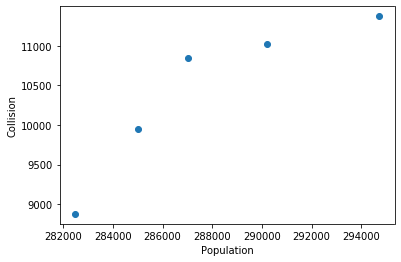

In [17]:
population = [282476, 285034, 287018, 290222, 294722]
collision = [8876, 9944, 10840, 11022, 11373]

m, b = np.polyfit(population, collision, 1)

plt.scatter(population, collision)
plt.xlabel('Population')
plt.ylabel('Collision')
plt.show()

In [18]:
listpoint = []

for i in range(52055):
    point = Point (collisions.X[i], collisions.Y[i])
    
    listpoint.append (point)
    
points = geopandas.GeoDataFrame(geometry = listpoint, index = range(52055))  
points

,geometry
0,POINT (-79.78304 36.07205)
1,POINT (-79.85937 36.04400)
2,POINT (-79.83988 36.02094)
3,POINT (-79.80225 36.05116)
4,POINT (-79.83020 36.05816)
...,...
52050,POINT (-79.99538 36.09177)
52051,POINT (-79.75764 36.07635)
52052,POINT (-79.81041 36.06300)
52053,POINT (-79.75018 35.99943)


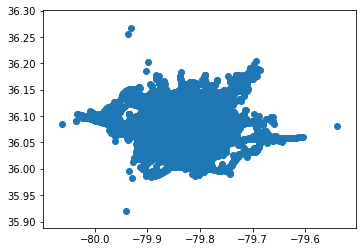

In [19]:
points.plot()

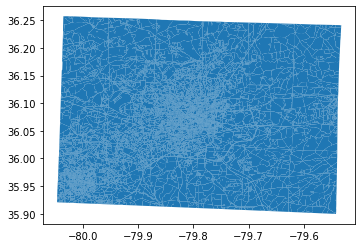

In [20]:
merged.geometry.plot()

In [21]:
merged['HD01_VD01'] = merged['HD01_VD01'].astype(int)

merged.HD01_VD01

0        2084
1        2084
2        2084
3        2084
4        2084
         ... 
11023    1320
11024    1320
11025    1320
11026    1320
11027    1320
Name: HD01_VD01, Length: 11028, dtype: int32

In [34]:
listpoly = []

for i in range (11028):
    if merged.HD01_VD01[i] == 0:
        listpoly.append(0)
        
    else:
        
        polygon = merged.geometry[i]
    
        count = 0
        for j in range (52055):
            point = Point (collisions.X[j], collisions.Y[j])
        
            if polygon.contains(point):
                count += 1
    
        listpoly.append(count)
    
listpoly

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 5,
 7,
 1,
 0,
 13,
 2,
 52,
 13,
 4,
 3,
 6,
 0,
 3,
 49,
 10,
 1,
 22,
 21,
 2,
 1,
 8,
 0,
 8,
 2,
 30,
 36,
 3,
 7,
 11,
 30,
 21,
 1,
 88,
 13,
 5,
 1,
 7,
 1,
 0,
 26,
 36,
 35,
 26,
 0,
 2,
 100,
 1,
 34,
 0,
 2,
 5,
 0,
 0,
 5,
 12,
 3,
 6,
 70,
 18,
 0,
 13,
 1,
 22,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [35]:
merged['contained'] = listpoly

In [36]:
count = 0
for i in range(11028):
    count += merged.contained[i]
    
count

51918

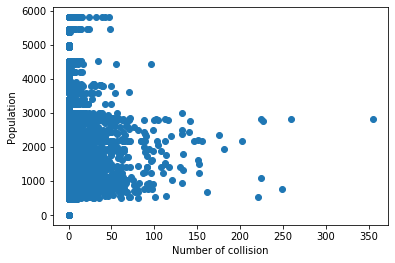

In [37]:
plt.scatter (merged.contained, merged.HD01_VD01)
plt.xlabel ('Number of collision')
plt.ylabel ('Population')
plt.show()

In [38]:
merged

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10_x,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,INTPTLAT10,INTPTLON10,geometry,GEOID10_2,GEO.id,GEOID10_y,GEO.display-label,HD01_VD01,HD02_VD01,contained
0,37,081,016900,1001,370810169001001,Block 1001,G5040,R,None,None,...,+35.9720551,-079.7229040,"POLYGON ((-79.72861 35.97573, -79.72858 35.975...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312,0
1,37,081,016900,1040,370810169001040,Block 1040,G5040,R,None,None,...,+35.9508420,-079.7272013,"POLYGON ((-79.72310 35.94995, -79.72497 35.949...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312,0
2,37,081,016900,1072,370810169001072,Block 1072,G5040,R,None,None,...,+35.9290345,-079.7164325,"POLYGON ((-79.72337 35.92370, -79.72296 35.924...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312,0
3,37,081,016900,1007,370810169001007,Block 1007,G5040,R,None,None,...,+35.9496594,-079.7524833,"POLYGON ((-79.76307 35.95719, -79.76308 35.957...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312,0
4,37,081,016900,1093,370810169001093,Block 1093,G5040,R,None,None,...,+35.9422794,-079.6980713,"POLYGON ((-79.70010 35.94171, -79.70013 35.942...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,37,081,014412,1002,370810144121002,Block 1002,G5040,U,38809,U,...,+36.0013966,-079.9848331,"POLYGON ((-79.98363 36.00058, -79.98489 36.000...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261,0
11024,37,081,014412,1004,370810144121004,Block 1004,G5040,U,38809,U,...,+35.9893001,-079.9776862,"POLYGON ((-79.97740 35.98879, -79.97753 35.988...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261,0
11025,37,081,014412,1003,370810144121003,Block 1003,G5040,U,38809,U,...,+35.9914665,-079.9788393,"POLYGON ((-79.98081 35.98935, -79.98141 35.989...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261,0
11026,37,081,014412,1000,370810144121000,Block 1000,G5040,U,38809,U,...,+36.0030375,-079.9812606,"POLYGON ((-79.97878 35.99816, -79.97874 35.999...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261,0


In [45]:
total1 = merged.groupby('GEO.display-label').sum()

total1

,ALAND10,AWATER10,HD01_VD01,HD02_VD01,contained
GEO.display-label,,,,,
"Block Group 1, Census Tract 101, Guilford County, North Carolina",1086678,0,64269,7326,411
"Block Group 1, Census Tract 102, Guilford County, North Carolina",830731,71661,69920,18016,386
"Block Group 1, Census Tract 103, Guilford County, North Carolina",1102492,18336,29547,8295,234
"Block Group 1, Census Tract 104.01, Guilford County, North Carolina",711939,0,27342,3534,279
"Block Group 1, Census Tract 104.03, Guilford County, North Carolina",1114504,0,28448,4480,306
...,...,...,...,...,...
"Block Group 4, Census Tract 168, Guilford County, North Carolina",9759738,21416,56475,9575,2
"Block Group 5, Census Tract 114, Guilford County, North Carolina",451006,0,8385,4095,107
"Block Group 5, Census Tract 137, Guilford County, North Carolina",896120,0,25420,6324,0


In [46]:
total2 = merged.groupby('GEO.display-label').mean()

total2

,ALAND10,AWATER10,HD01_VD01,HD02_VD01,contained
GEO.display-label,,,,,
"Block Group 1, Census Tract 101, Guilford County, North Carolina",29369.675676,0.000000,1737,198.0,11.108108
"Block Group 1, Census Tract 102, Guilford County, North Carolina",25960.343750,2239.406250,2185,563.0,12.062500
"Block Group 1, Census Tract 103, Guilford County, North Carolina",52499.619048,873.142857,1407,395.0,11.142857
"Block Group 1, Census Tract 104.01, Guilford County, North Carolina",22965.774194,0.000000,882,114.0,9.000000
"Block Group 1, Census Tract 104.03, Guilford County, North Carolina",39803.714286,0.000000,1016,160.0,10.928571
...,...,...,...,...,...
"Block Group 4, Census Tract 168, Guilford County, North Carolina",390389.520000,856.640000,2259,383.0,0.080000
"Block Group 5, Census Tract 114, Guilford County, North Carolina",34692.769231,0.000000,645,315.0,8.230769
"Block Group 5, Census Tract 137, Guilford County, North Carolina",28907.096774,0.000000,820,204.0,0.000000


In [47]:
total1['population'] = total2['HD01_VD01']

total1

,ALAND10,AWATER10,HD01_VD01,HD02_VD01,contained,population
GEO.display-label,,,,,,
"Block Group 1, Census Tract 101, Guilford County, North Carolina",1086678,0,64269,7326,411,1737
"Block Group 1, Census Tract 102, Guilford County, North Carolina",830731,71661,69920,18016,386,2185
"Block Group 1, Census Tract 103, Guilford County, North Carolina",1102492,18336,29547,8295,234,1407
"Block Group 1, Census Tract 104.01, Guilford County, North Carolina",711939,0,27342,3534,279,882
"Block Group 1, Census Tract 104.03, Guilford County, North Carolina",1114504,0,28448,4480,306,1016
...,...,...,...,...,...,...
"Block Group 4, Census Tract 168, Guilford County, North Carolina",9759738,21416,56475,9575,2,2259
"Block Group 5, Census Tract 114, Guilford County, North Carolina",451006,0,8385,4095,107,645
"Block Group 5, Census Tract 137, Guilford County, North Carolina",896120,0,25420,6324,0,820


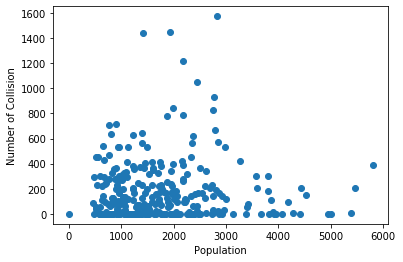

In [24]:
plt.scatter (total1.population, total1.collision)
plt.xlabel ('Population')
plt.ylabel ('Number of Collision')
plt.show()

Those points that have population but not collision data are Guildford County outside Greensboro. So following steps are what I did to remove those areas.

In [32]:
copy = total1

copy

,population,collision
0,1737,411
1,2185,386
2,1407,234
3,882,279
4,1016,306
...,...,...
287,2259,2
288,645,107
289,820,0
290,1625,0


In [34]:
s = copy['collision']
collist = []

for i in range (292):
    collist.append(s[i])
    
collist

[411,
 386,
 234,
 279,
 306,
 87,
 290,
 209,
 136,
 536,
 221,
 414,
 468,
 719,
 169,
 130,
 395,
 128,
 167,
 451,
 326,
 408,
 116,
 92,
 199,
 43,
 95,
 537,
 1047,
 58,
 79,
 534,
 359,
 454,
 664,
 827,
 641,
 316,
 574,
 157,
 121,
 97,
 169,
 177,
 359,
 234,
 1213,
 928,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 147,
 62,
 204,
 4,
 40,
 183,
 232,
 98,
 29,
 6,
 0,
 0,
 30,
 127,
 167,
 281,
 188,
 143,
 28,
 842,
 146,
 158,
 111,
 0,
 204,
 300,
 0,
 0,
 0,
 0,
 0,
 782,
 19,
 0,
 1,
 5,
 1,
 107,
 1573,
 22,
 41,
 1,
 170,
 0,
 73,
 0,
 0,
 98,
 419,
 0,
 362,
 1440,
 429,
 238,
 59,
 268,
 561,
 365,
 329,
 232,
 1447,
 302,
 300,
 385,
 626,
 276,
 534,
 99,
 114,
 138,
 381,
 208,
 100,
 143,
 250,
 66,
 120,
 351,
 25,
 785,
 201,
 367,
 96,
 328,
 201,
 267,
 337,
 171,
 70,
 92,
 240,
 393,
 259,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 14,
 0,
 12,
 223,
 0,
 338,
 170,
 175,
 132,
 68,
 1

In [35]:
s = copy['population']
poplist = []

for i in range (292):
    poplist.append(s[i])
    
poplist

[1737,
 2185,
 1407,
 882,
 1016,
 845,
 672,
 1234,
 1028,
 951,
 643,
 1113,
 777,
 911,
 2459,
 1403,
 1997,
 854,
 953,
 523,
 829,
 1453,
 2018,
 1722,
 1498,
 1523,
 1597,
 664,
 2440,
 1504,
 1644,
 1490,
 1244,
 2330,
 2794,
 2755,
 1403,
 2255,
 2846,
 2418,
 1722,
 685,
 1453,
 1976,
 862,
 2741,
 2176,
 2777,
 1478,
 1401,
 1066,
 1092,
 636,
 1201,
 781,
 611,
 2392,
 2465,
 2391,
 1240,
 1228,
 1847,
 1320,
 710,
 2860,
 2384,
 1519,
 1243,
 3132,
 4522,
 797,
 5455,
 5375,
 1434,
 3805,
 535,
 4192,
 2761,
 4272,
 3389,
 3922,
 2971,
 1867,
 1862,
 2187,
 2818,
 2061,
 1472,
 1982,
 2760,
 1658,
 2235,
 3826,
 4429,
 3798,
 4061,
 2058,
 3668,
 1301,
 4996,
 1871,
 3898,
 2130,
 1956,
 2628,
 1933,
 1235,
 2823,
 2451,
 928,
 2512,
 2866,
 1986,
 968,
 2084,
 1754,
 2220,
 3271,
 0,
 1444,
 1412,
 675,
 684,
 590,
 961,
 1403,
 1617,
 1062,
 1594,
 1926,
 960,
 596,
 1762,
 1222,
 763,
 942,
 847,
 1010,
 1083,
 1229,
 2695,
 945,
 2922,
 1880,
 1073,
 1136,
 1601,
 1531,

In [33]:
d = {'population': poplist, 'collision':collist}
df = pd.DataFrame(data = d)

df

NameError: name 'poplist' is not defined

In [55]:
total1 = pd.read_table (os.path.join ('data', 'exported.dat'), sep = '\t')
df = total1
total1

,population,collision
0,1737,411
1,2185,386
2,1407,234
3,882,279
4,1016,306
...,...,...
287,2259,2
288,645,107
289,820,0
290,1625,0


In [56]:
test = total1
indexlist = []

#for i in range (292):
#    if (copy2.collision[i] == 0) or (copy2.collision[i] <= 30 and copy2.population[i] >= 1000):
#        indexlist.append(i)

for i in range (292):
    if (test.collision[i] <= 10) or (test.collision[i]/test.population[i] < 0.05):
        indexlist.append(i)

        
indexlist

[25,
 29,
 30,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 87,
 91,
 92,
 93,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 108,
 109,
 110,
 112,
 114,
 115,
 116,
 118,
 142,
 147,
 151,
 157,
 158,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 190,
 191,
 192,
 193,
 195,
 196,
 197,
 203,
 204,
 205,
 206,
 207,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 219,
 222,
 224,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 252,
 255,
 256,
 258,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 286,
 287,
 289,
 290]

In [57]:
copy4 = total1
indexlist = []

for i in range (292):
    if (copy4.collision[i] == 0):
        indexlist.append(i)
indexlist

[48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 79,
 80,
 92,
 95,
 96,
 97,
 98,
 99,
 102,
 112,
 114,
 115,
 118,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 181,
 184,
 191,
 203,
 204,
 206,
 212,
 214,
 215,
 216,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 265,
 266,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 289,
 290]

In [58]:
outsideGSBO = copy4.drop(indexlist)

outsideGSBO

,population,collision
0,1737,411
1,2185,386
2,1407,234
3,882,279
4,1016,306
...,...,...
285,1313,244
286,715,15
287,2259,2
288,645,107


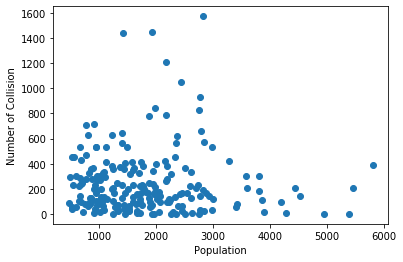

In [59]:
plt.scatter (outsideGSBO.population, outsideGSBO.collision)
plt.xlabel ('Population')
plt.ylabel ('Number of Collision')
plt.show()

In [60]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'collision ~ population', data = copy4).fit()

lm.params

Intercept     170.489040
population      0.004128
dtype: float64

In [61]:
for i in range (292):
    print (test.population[i], test.collision[i])

1737 411
2185 386
1407 234
882 279
1016 306
845 87
672 290
1234 209
1028 136
951 536
643 221
1113 414
777 468
911 719
2459 169
1403 130
1997 395
854 128
953 167
523 451
829 326
1453 408
2018 116
1722 92
1498 199
1523 43
1597 95
664 537
2440 1047
1504 58
1644 79
1490 534
1244 359
2330 454
2794 664
2755 827
1403 641
2255 316
2846 574
2418 157
1722 121
685 97
1453 169
1976 177
862 359
2741 234
2176 1213
2777 928
1478 0
1401 0
1066 0
1092 0
636 0
1201 0
781 0
611 0
2392 0
2465 0
2391 0
1240 0
1228 0
1847 0
1320 0
710 0
2860 0
2384 0
1519 0
1243 0
3132 0
4522 147
797 62
5455 204
5375 4
1434 40
3805 183
535 232
4192 98
2761 29
4272 6
3389 0
3922 0
2971 30
1867 127
1862 167
2187 281
2818 188
2061 143
1472 28
1982 842
2760 146
1658 158
2235 111
3826 0
4429 204
3798 300
4061 0
2058 0
3668 0
1301 0
4996 0
1871 782
3898 19
2130 0
1956 1
2628 5
1933 1
1235 107
2823 1573
2451 22
928 41
2512 1
2866 170
1986 0
968 73
2084 0
1754 0
2220 98
3271 419
0 0
1444 362
1412 1440
675 429
684 238
590 59
961 268

In [62]:
test2 = test.drop(indexlist)

test2

,population,collision
0,1737,411
1,2185,386
2,1407,234
3,882,279
4,1016,306
...,...,...
285,1313,244
286,715,15
287,2259,2
288,645,107


In [63]:
plt.scatter (copy3.collision, copy3.population)
plt.xlabel ('Number of collision')
plt.ylabel ('Population')
plt.show()

NameError: name 'copy3' is not defined

In [64]:
from sklearn.cluster import KMeans
est = KMeans(5) 
est.fit(copy3)
y_kmeans = est.predict(copy3)
plt.scatter(copy3.population, copy3.collision, c=y_kmeans, cmap='rainbow');
plt.xlabel ('Population')
plt.ylabel ('Number of collision')

NameError: name 'copy3' is not defined

Text(0, 0.5, 'Number of collision')

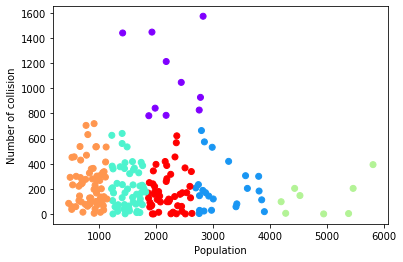

In [69]:
est = KMeans(6)  
est.fit(outsideGSBO)
y_kmeans = est.predict(outsideGSBO)
plt.scatter(outsideGSBO.population, outsideGSBO.collision, c=y_kmeans, cmap='rainbow');
plt.xlabel ('Population')
plt.ylabel ('Number of collision')

In [66]:
from fig_code import visualize_tree, plot_tree_interactive

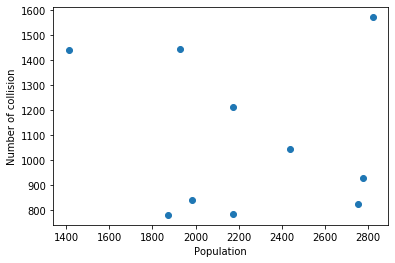

In [67]:
test2 = df
indexlist = []

#for i in range (292):
#    if (copy2.collision[i] == 0) or (copy2.collision[i] <= 30 and copy2.population[i] >= 1000):
#        indexlist.append(i)

for i in range (292):
    if (test2.collision[i] < 780) or (test2.population[i] < 900) :
        indexlist.append(i)
        
mostDanger = copy4.drop(indexlist)

plt.scatter (mostDanger.population, mostDanger.collision)
plt.xlabel ('Population')
plt.ylabel ('Number of collision')
plt.show()


In [70]:
merged

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10_x,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,AWATER10,INTPTLAT10,INTPTLON10,geometry,GEOID10_2,GEO.id,GEOID10_y,GEO.display-label,HD01_VD01,HD02_VD01
0,37,081,016900,1001,370810169001001,Block 1001,G5040,R,None,None,...,0,+35.9720551,-079.7229040,"POLYGON ((-79.72861 35.97573, -79.72858 35.975...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
1,37,081,016900,1040,370810169001040,Block 1040,G5040,R,None,None,...,0,+35.9508420,-079.7272013,"POLYGON ((-79.72310 35.94995, -79.72497 35.949...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
2,37,081,016900,1072,370810169001072,Block 1072,G5040,R,None,None,...,0,+35.9290345,-079.7164325,"POLYGON ((-79.72337 35.92370, -79.72296 35.924...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
3,37,081,016900,1007,370810169001007,Block 1007,G5040,R,None,None,...,12870,+35.9496594,-079.7524833,"POLYGON ((-79.76307 35.95719, -79.76308 35.957...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
4,37,081,016900,1093,370810169001093,Block 1093,G5040,R,None,None,...,0,+35.9422794,-079.6980713,"POLYGON ((-79.70010 35.94171, -79.70013 35.942...",370810169001,1500000US370810169001,370810169001,"Block Group 1, Census Tract 169, Guilford Coun...",2084,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,37,081,014412,1002,370810144121002,Block 1002,G5040,U,38809,U,...,0,+36.0013966,-079.9848331,"POLYGON ((-79.98363 36.00058, -79.98489 36.000...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261
11024,37,081,014412,1004,370810144121004,Block 1004,G5040,U,38809,U,...,0,+35.9893001,-079.9776862,"POLYGON ((-79.97740 35.98879, -79.97753 35.988...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261
11025,37,081,014412,1003,370810144121003,Block 1003,G5040,U,38809,U,...,0,+35.9914665,-079.9788393,"POLYGON ((-79.98081 35.98935, -79.98141 35.989...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261
11026,37,081,014412,1000,370810144121000,Block 1000,G5040,U,38809,U,...,0,+36.0030375,-079.9812606,"POLYGON ((-79.97878 35.99816, -79.97874 35.999...",370810144121,1500000US370810144121,370810144121,"Block Group 1, Census Tract 144.12, Guilford C...",1320,261


In [87]:
geometryList = []
displayList = []

for i in range (11028):
    geometryList.append(merged.geometry[i])

displayList = merged["GEO.display-label"]

In [95]:
data = {'geometry': geometryList, 'display':displayList}
dangerDF = pd.DataFrame(data = data)

In [96]:
dangerDF

,geometry,display
0,"POLYGON ((-79.72861 35.975729, -79.72857599999...","Block Group 1, Census Tract 169, Guilford Coun..."
1,"POLYGON ((-79.72310399999999 35.949953, -79.72...","Block Group 1, Census Tract 169, Guilford Coun..."
2,"POLYGON ((-79.723367 35.9237, -79.72296 35.924...","Block Group 1, Census Tract 169, Guilford Coun..."
3,"POLYGON ((-79.76307 35.957187, -79.763077 35.9...","Block Group 1, Census Tract 169, Guilford Coun..."
4,"POLYGON ((-79.700104 35.941711, -79.7001289999...","Block Group 1, Census Tract 169, Guilford Coun..."
...,...,...
11023,"POLYGON ((-79.983627 36.00058, -79.984894 36.0...","Block Group 1, Census Tract 144.12, Guilford C..."
11024,"POLYGON ((-79.977402 35.988788, -79.9775339999...","Block Group 1, Census Tract 144.12, Guilford C..."
11025,"POLYGON ((-79.980813 35.989346, -79.981413 35....","Block Group 1, Census Tract 144.12, Guilford C..."
11026,"POLYGON ((-79.97877699999999 35.998163, -79.97...","Block Group 1, Census Tract 144.12, Guilford C..."


In [102]:
polyList = []

for i in range (11028):
    if dangerDF.display[i] == "Block Group 2, Census Tract 103, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 1, Census Tract 164.05, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 2, Census Tract 108, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 1, Census Tract 160.11, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 2, Census Tract 126.01, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    
    if dangerDF.display[i] == "Block Group 1, Census Tract 128.04, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 1, Census Tract 125.09, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 1, Census Tract 126.09, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
    if dangerDF.display[i] == "Block Group 1, Census Tract 128.05, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
    
    if dangerDF.display[i] == "Block Group 1, Census Tract 165.03, Guilford County, North Carolina":
        polyList.append(dangerDF.geometry[i])
        
polyList

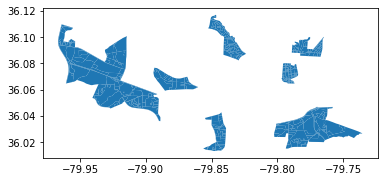

In [106]:

dangerGDF = geopandas.GeoDataFrame(geometry = polyList)

dangerGDF.plot()

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [109]:
lm = smf.ols(formula = 'collision ~ population', data = mostDanger).fit()

lm.params

Intercept     1275.522322
population      -0.083776
dtype: float64

In [110]:
y = test_func(mostDanger.ravel(), error)

In [111]:
model = PolynomialRegression(2)
model.fit (mostDanger, lm)

TypeError: Singleton array array(<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024DB897DA88>,
      dtype=object) cannot be considered a valid collection.